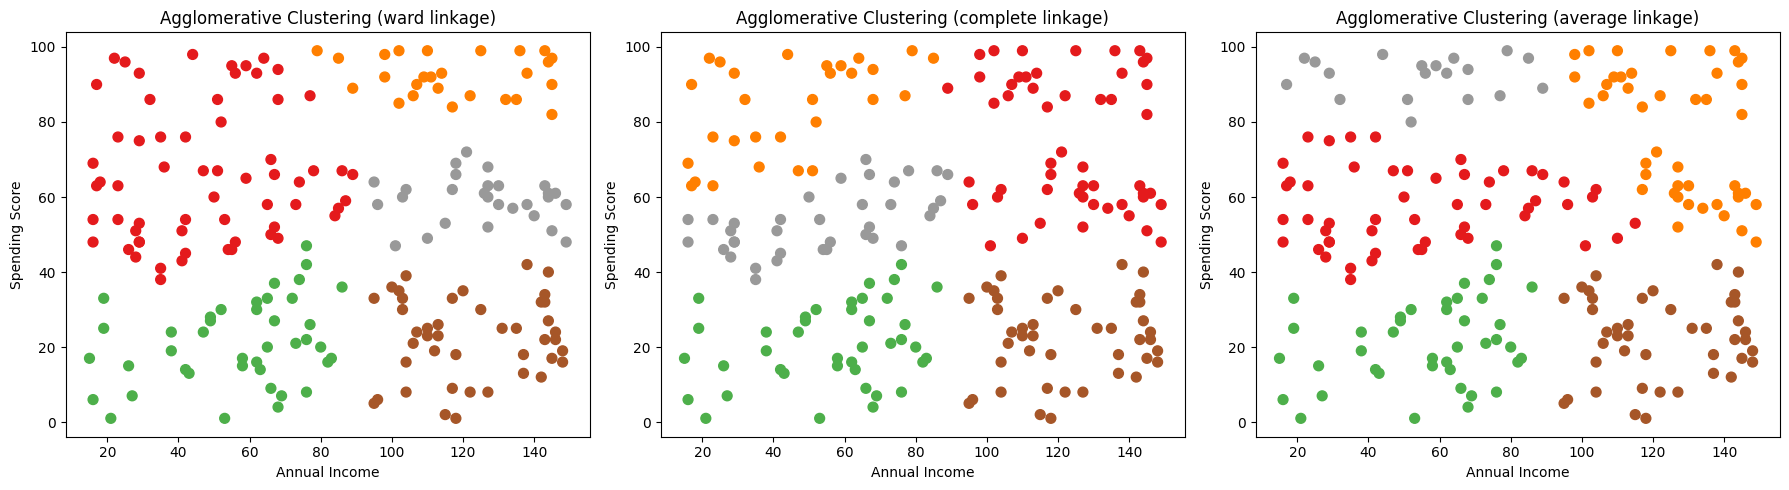

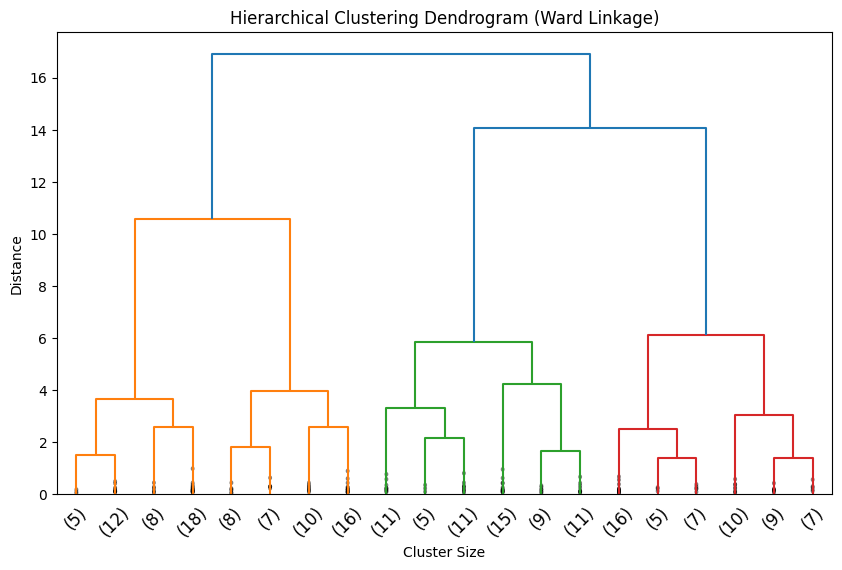

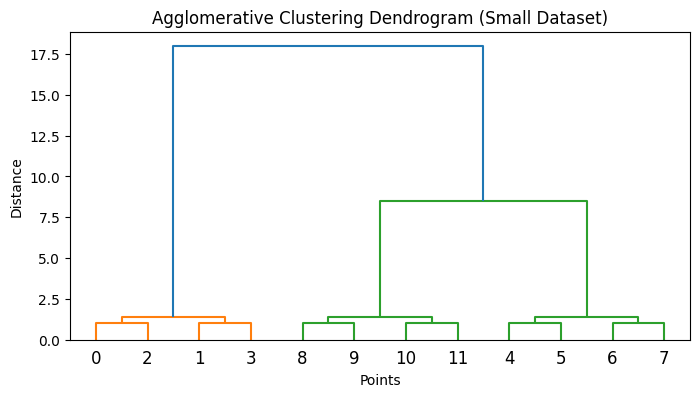

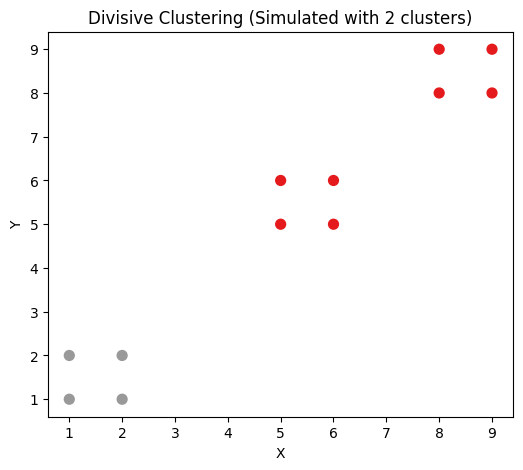

In [22]:
# -*- coding: utf-8 -*-
"""l01c01_introduction_to_colab_and_python.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb
"""

# =========================================================
# Agglomerative Hierarchical Clustering Lab
# Fully self-contained, error-free
# No sklearn-extra needed
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# =========================================================
# QUESTION 1: Agglomerative Clustering with Different Linkages
# =========================================================

# Synthetic shopping data
np.random.seed(42)
annual_income = np.random.randint(15, 150, size=200)
spending_score = np.random.randint(1, 100, size=200)
X = np.column_stack((annual_income, spending_score))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linkages = ['ward', 'complete', 'average']

plt.figure(figsize=(18,5))
for i, link in enumerate(linkages):
    cluster = AgglomerativeClustering(n_clusters=5, linkage=link)
    y_pred = cluster.fit_predict(X_scaled)

    plt.subplot(1,3,i+1)
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='Set1', s=50)
    plt.title(f'Agglomerative Clustering ({link} linkage)')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

# =========================================================
# QUESTION 2: Dendrogram
# =========================================================

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# =========================================================
# QUESTION 3: Agglomerative vs Divisive (Simulated)
# =========================================================

# Small synthetic dataset (12 points)
X_small = np.array([[1,2],[2,1],[1,1],[2,2],
                    [8,8],[9,8],[8,9],[9,9],
                    [5,5],[6,5],[5,6],[6,6]])

# Agglomerative dendrogram
Z_agg = linkage(X_small, method='ward')
plt.figure(figsize=(8,4))
dendrogram(Z_agg)
plt.title("Agglomerative Clustering Dendrogram (Small Dataset)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

# Simulated Divisive Clustering
# Step 1: Split into 2 clusters using Agglomerative (top-level)
cluster_div1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_div1 = cluster_div1.fit_predict(X_small)

plt.figure(figsize=(6,5))
plt.scatter(X_small[:,0], X_small[:,1], c=labels_div1, cmap='Set1', s=50)
plt.title("Divisive Clustering (Simulated with 2 clusters)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# =========================================================
# NOTES:
# - Agglomerative = bottom-up merging
# - Divisive = top-down splitting (simulated)
# - Agglomerative is more common and computationally cheaper
# - Divisive can give clearer clusters for small datasets
# =========================================================